In [2]:
from itertools import groupby

import pandas as pd
from PIL.ImageColor import colormap

In [3]:
df = pd.read_csv("C:/Users/diego/Desktop/cursos/viajes_surfistas.csv")
df

,homename,homecontinent,homecountry,homelat,homelon,travelcontinent,travelcountry,travellat,travellon
0,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
1,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.022100,-118.481000
2,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,34.030400,-118.779000
3,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.887255,-118.411912
4,Canadian in La La Land,North America,United States of America,33.930030,-118.280993,North America,United States of America,33.888889,-118.405278
...,...,...,...,...,...,...,...,...,...
9506,"Bridgetown, Western Australia",Australia,Australia,-33.954448,116.131214,Australia,Australia,-34.225000,115.017000
9507,"Lille, France",Europe,France,50.629250,3.057256,Europe,France,45.002343,-1.201475
9508,MX,South America,Mexico,23.634501,-102.552784,South America,Mexico,21.016700,-101.250000
9509,Kuta - Bali - Indonesia,Asia,Indonesia,-8.739184,115.171130,Asia,Indonesia,-8.710093,115.166845


In [5]:
df['homecountry'].unique()

array(['United States of America', 'France', 'Indonesia', 'Spain',
       'United Kingdom', 'Philippines', 'Australia', 'Germany', 'Brazil',
       'Ireland', 'Japan', 'Colombia', 'Morocco', 'Chile', 'Kuwait',
       'Uruguay', 'Italy', 'South Korea', 'Venezuela', 'India', 'Peru',
       'New Zealand', 'Mexico', 'Oman', 'Netherlands', 'Bangladesh',
       'Kenya', 'Thailand', 'Switzerland', 'Argentina', 'Lebanon',
       'Malaysia', 'Poland', 'Dominican Republic', 'Portugal', 'Jordan',
       'Canada', 'Singapore', 'Costa Rica', 'United Arab Emirates',
       'Uzbekistan', 'Qatar', 'Panama', 'Saint Barthelemy',
       'South Africa', 'Ukraine', 'Greece', 'Norway', 'Turkey',
       'French Polynesia', 'Slovenia', 'Guatemala', 'Taiwan', 'Nicaragua',
       'Ecuador', 'Hong Kong S.A.R.', 'El Salvador', 'Paraguay', 'Russia',
       'Namibia', 'Puerto Rico', 'Belgium', 'Nigeria', 'Jersey', 'Cuba',
       'China', 'Uganda', 'Belarus', 'Sri Lanka', 'Romania', 'Slovakia',
       'Sweden', 'Lux

In [7]:
len(df['homecountry'].unique())

101

In [8]:
agrupado=df.groupby('homecountry').agg({
    'homename':'count'
})
agrupado

,homename
homecountry,
Andorra,1
Argentina,143
Australia,809
Austria,3
Bahrain,2
...,...
United States Virgin Islands,2
United States of America,2826
Uruguay,21


In [20]:
Agrupado_ordenado=agrupado.sort_values('homename',ascending=False)
Agrupado_ordenado

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752
United Kingdom,496
...,...
Namibia,1
Nepal,1
Slovakia,1


In [18]:
top_4=Agrupado_ordenado.head(4)
top_4

,homename
homecountry,
United States of America,2826
Japan,893
Australia,809
Spain,752


In [23]:
df_otros= Agrupado_ordenado.drop(index=top_4.index.values)
df_otros

,homename
homecountry,
United Kingdom,496
France,433
Brazil,379
Portugal,367
Italy,295
...,...
Namibia,1
Nepal,1
Slovakia,1


In [24]:
df_otros['pais']='otros'
df_otros

,homename,pais
homecountry,,
United Kingdom,496,otros
France,433,otros
Brazil,379,otros
Portugal,367,otros
Italy,295,otros
...,...,...
Namibia,1,otros
Nepal,1,otros
Slovakia,1,otros


In [27]:
df_otros_agrupado= df_otros.groupby('pais').agg({
    'homename':'sum'
})
df_otros_agrupado

,homename
pais,
otros,4231


In [28]:
df_otros_agrupado=df_otros_agrupado.reset_index()
df_otros_agrupado

,pais,homename
0,otros,4231


In [31]:
top_4=top_4.reset_index()
top_4

,homecountry,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [32]:
top_4.columns=['Pais', 'homename']
top_4

,Pais,homename
0,United States of America,2826
1,Japan,893
2,Australia,809
3,Spain,752


In [34]:
df_final=pd.concat([top_4, df_otros_agrupado])
df_final

,Pais,homename,pais
0,United States of America,2826,NaN
1,Japan,893,NaN
2,Australia,809,NaN
3,Spain,752,NaN
0,NaN,4231,otros


In [35]:
df_final.set_index('pais')
df_final

,Pais,homename,pais
0,United States of America,2826,NaN
1,Japan,893,NaN
2,Australia,809,NaN
3,Spain,752,NaN
0,NaN,4231,otros


<Axes: ylabel='homename'>

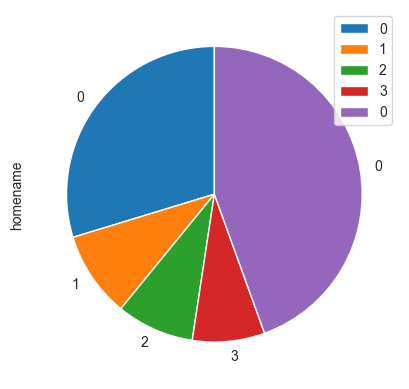

In [44]:
df_final.plot.pie(
    y='homename',
    startangle=90,
    #autopct='%1.1f%%',

)